In [218]:
import pandas as pd 
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [219]:
df=pd.read_csv("ClustersCountiesVoting.csv").drop('Unnamed: 0',axis=1)

In [220]:
for i in ['Current_Cluster',
       'Demographic_Cluster', 'Economic_Cluster', 'Owned_Cluster',
       'Age_Cluster', 'Education_Cluster', 'Housing_Cluster','Combined_Cluster']:
    cols=pd.get_dummies(df[i])
    strings=[]
    for j in range(len(cols.columns)):
        strings.append(i+str(j))
        df[i+str(j)]=cols[cols.columns[j]]
    print(i,len(cols.columns))
    cols.columns=strings

Current_Cluster 6
Demographic_Cluster 7
Economic_Cluster 9
Owned_Cluster 7
Age_Cluster 5
Education_Cluster 6
Housing_Cluster 7
Combined_Cluster 10


In [297]:
df['Winner2016']=0
df.ix[df['per_point_diff_2016']>0,'Winner2016']=1
df['Winner2012']=0
df.ix[df['per_point_diff_2012']>0,'Winner2012']=1
dems=df[df['Winner2016']==1]
df['Winner_2016']="R2016"
df.ix[df['per_point_diff_2016']>0,'Winner_2016']="D2016"
df['Winner_2012']="R2012"
df.ix[df['per_point_diff_2012']>0,'Winner_2012']="D2012"
dems=df[df['Winner_2016']==1]

In [222]:
demographic=["Demographic_Cluster0","Demographic_Cluster1","Demographic_Cluster2","Demographic_Cluster3",
            "Demographic_Cluster4","Demographic_Cluster5","Demographic_Cluster6"]
economic=["Economic_Cluster0","Economic_Cluster1","Economic_Cluster2","Economic_Cluster3",
            "Economic_Cluster4","Economic_Cluster5","Economic_Cluster6","Economic_Cluster7","Economic_Cluster8"]
econ=["Economic_Cluster0"]
education=["Education_Cluster0","Education_Cluster1","Education_Cluster2","Education_Cluster3","Education_Cluster4",
                "Education_Cluster5"]

In [223]:
#Params:
#x- predictors (represented as list of strings)
#y- response (represented as list of strings)
#y2- secondary response
#df- original dataframe
#df2- subset
def clusteringalgo(x,y,y2,df,df2):
    model=SVC()
    model2=KNeighborsClassifier()
    model.fit(df[x],df[y])
    model2.fit(df[x],df[y])
    print("SVC overall accuracy for training is"+str(model.score(df[x],df[y])))
    print("KMeans overall accuracy for training is"+str(model2.score(df[x],df[y])))
    print("SVC overall accuracy for predictive testing is"+str(model.score(df[x],df[y2])))
    print("KMeans overall accuracy for predictive testing is"+str(model2.score(df[x],df[y2])))
    print("SVC subset accuracy for testing is"+str(model.score(df2[x],df2[y])))
    print("KMeans subset accuracy for testing is"+str(model2.score(df2[x],df2[y])))
    print("SVC subset accuracy for predictive testing is"+str(model.score(df2[x],df2[y2])))
    print("KMeans subset accuracy for predictive testing is"+str(model2.score(df2[x],df2[y2])))

In [224]:
model=SVC()

In [225]:
clusteringalgo(["Education_Cluster0","Education_Cluster1","Education_Cluster2","Education_Cluster3","Education_Cluster4",
                "Education_Cluster5"],'Winner2012',"Winner2016",df,dems)

SVC overall accuracy for training is0.79530848329
KMeans overall accuracy for training is0.79530848329
SVC overall accuracy for predictive testing is0.866002570694
KMeans overall accuracy for predictive testing is0.866002570694
SVC subset accuracy for testing is0.286885245902
KMeans subset accuracy for testing is0.286885245902
SVC subset accuracy for predictive testing is0.299180327869
KMeans subset accuracy for predictive testing is0.299180327869


In [226]:
clusteringalgo(["Education_Cluster0","Education_Cluster1","Education_Cluster2","Education_Cluster3","Education_Cluster4",
                "Education_Cluster5","White%"],'Winner2012',"Winner2016",df,dems)

SVC overall accuracy for training is0.851863753213
KMeans overall accuracy for training is0.863753213368
SVC overall accuracy for predictive testing is0.903920308483
KMeans overall accuracy for predictive testing is0.899100257069
SVC subset accuracy for testing is0.534836065574
KMeans subset accuracy for testing is0.672131147541
SVC subset accuracy for predictive testing is0.514344262295
KMeans subset accuracy for predictive testing is0.647540983607


In [227]:
model2=KNeighborsClassifier()
clusteringalgo(["Demographic_Cluster0","Demographic_Cluster1","Demographic_Cluster2","Demographic_Cluster3",
            "Demographic_Cluster4","Demographic_Cluster5","Demographic_Cluster6","Education_Cluster0",
              "Education_Cluster1","Education_Cluster2","Education_Cluster3","Education_Cluster4",
                "Education_Cluster5"],'Winner2012',"Winner2016",df,dems)

SVC overall accuracy for training is0.829048843188
KMeans overall accuracy for training is0.822622107969
SVC overall accuracy for predictive testing is0.879820051414
KMeans overall accuracy for predictive testing is0.866323907455
SVC subset accuracy for testing is0.588114754098
KMeans subset accuracy for testing is0.727459016393
SVC subset accuracy for predictive testing is0.608606557377
KMeans subset accuracy for predictive testing is0.764344262295


In [228]:
clusteringalgo(["Demographic_Cluster0","Demographic_Cluster1","Demographic_Cluster2","Demographic_Cluster3",
            "Demographic_Cluster4","Demographic_Cluster5","Demographic_Cluster6","MedianIncome"],'Winner2012',"Winner2016",df,dems)

SVC overall accuracy for training is0.956940874036
KMeans overall accuracy for training is0.812017994859
SVC overall accuracy for predictive testing is0.914524421594
KMeans overall accuracy for predictive testing is0.848650385604
SVC subset accuracy for testing is0.83606557377
KMeans subset accuracy for testing is0.362704918033
SVC subset accuracy for predictive testing is0.795081967213
KMeans subset accuracy for predictive testing is0.325819672131


In [229]:
clusteringalgo(["Economic_Cluster0","Economic_Cluster1","Economic_Cluster2","Economic_Cluster3",
            "Economic_Cluster4","Economic_Cluster5","Economic_Cluster6","Economic_Cluster7","Economic_Cluster8",],
               "Winner2012","Winner2016",df,dems)

SVC overall accuracy for training is0.781491002571
KMeans overall accuracy for training is0.778277634961
SVC overall accuracy for predictive testing is0.845115681234
KMeans overall accuracy for predictive testing is0.84383033419
SVC subset accuracy for testing is0.0655737704918
KMeans subset accuracy for testing is0.122950819672
SVC subset accuracy for predictive testing is0.0245901639344
KMeans subset accuracy for predictive testing is0.0983606557377


In [230]:
clusteringalgo(["Pop2014","Pop2010EST","Pop%Change","Pop2010",
                    "Under5%","Under18%","Over65%","Female%",
                     "White%","Black%","NativeA%","Asian%",
                    "PIsland%","TwoRace%","Latino", "WhiteNLat%",
                     "SameHouse1yr%","ForeignBorn%","NonEnglish%","HighSchoolGrad%",
                    "Bachelor%","Veteran", "TravelTime","HousingUnits", 
                     "OwnershipRate","UnitsinMultiUnit%","MedianValueHousing",
                     "Households","PerCapitaIncome","MedianIncome","%BelowPoverty",
                     "PrivateNotFarmsEstablish","PrivateNotFarmEmploy","NotFarm%Change","NonEmployerEstablish",
                    "Black-owned%","Native-owned%","Asian-owned%","PIslnder-owned%",
                     "Hispanic-owned%","Woman-owned","Manfact shipments 1k",
                    "Merchant sales 1k","Retail sales 1k","Retail sales/capita",
                     "Accomd/FoodServ sales 1k","BuildingPermits","LandArea","Pop/SqMile"],"Winner2012","Winner2016",df,dems)

SVC overall accuracy for training is1.0
KMeans overall accuracy for training is0.845115681234
SVC overall accuracy for predictive testing is0.9235218509
KMeans overall accuracy for predictive testing is0.879820051414
SVC subset accuracy for testing is1.0
KMeans subset accuracy for testing is0.497950819672
SVC subset accuracy for predictive testing is0.959016393443
KMeans subset accuracy for predictive testing is0.477459016393


In [231]:
clusteringalgo(["Female%",
                     "White%","Black%","NativeA%","Asian%",
                    "PIsland%","TwoRace%","Latino", "WhiteNLat%"],"Winner2012","Winner2016",df,dems)

SVC overall accuracy for training is0.910989717224
KMeans overall accuracy for training is0.883354755784
SVC overall accuracy for predictive testing is0.942480719794
KMeans overall accuracy for predictive testing is0.920629820051
SVC subset accuracy for testing is0.790983606557
KMeans subset accuracy for testing is0.709016393443
SVC subset accuracy for predictive testing is0.754098360656
KMeans subset accuracy for predictive testing is0.717213114754


In [232]:
clusteringalgo(["Female%",
                     "White%","Black%","NativeA%","Asian%",
                    "PIsland%","TwoRace%","Latino", "WhiteNLat%"],"Winner2012","Winner2016",df,df[df['Demographic_Cluster4']!=0])

SVC overall accuracy for training is0.910989717224
KMeans overall accuracy for training is0.883354755784
SVC overall accuracy for predictive testing is0.942480719794
KMeans overall accuracy for predictive testing is0.920629820051
SVC subset accuracy for testing is1.0
KMeans subset accuracy for testing is0.785714285714
SVC subset accuracy for predictive testing is0.714285714286
KMeans subset accuracy for predictive testing is0.642857142857


In [233]:
clusteringalgo(["Female%",
                     "White%","Black%","NativeA%","Asian%",
                    "PIsland%","TwoRace%","Latino", "WhiteNLat%"],"Winner2012","Winner2016",df,df[df['Demographic_Cluster0']!=0])

SVC overall accuracy for training is0.910989717224
KMeans overall accuracy for training is0.883354755784
SVC overall accuracy for predictive testing is0.942480719794
KMeans overall accuracy for predictive testing is0.920629820051
SVC subset accuracy for testing is0.941908713693
KMeans subset accuracy for testing is0.900414937759
SVC subset accuracy for predictive testing is0.879668049793
KMeans subset accuracy for predictive testing is0.879668049793


In [340]:
clusteringalgo(["Female%",
                     "White%","Black%","NativeA%","Asian%",
                    "PIsland%","TwoRace%","Latino", "WhiteNLat%"],"Winner2012","Winner2016",df,df[df['Demographic_Cluster4']!=0])

SVC overall accuracy for training is0.910989717224
KMeans overall accuracy for training is0.883354755784
SVC overall accuracy for predictive testing is0.942480719794
KMeans overall accuracy for predictive testing is0.920629820051
SVC subset accuracy for testing is1.0
KMeans subset accuracy for testing is0.785714285714
SVC subset accuracy for predictive testing is0.714285714286
KMeans subset accuracy for predictive testing is0.642857142857


In [341]:
df[df['Demographic_Cluster4']!=0].groupby(['Winner2012','Winner2016']).count()

FIPS  area_name  state_abbreviation  Pop2014  \
Winner2012 Winner2016                                                 
0          0              8          8                   8        8   
1          0              8          8                   8        8   
           1             12         12                  12       12   

                       Pop2010EST  Pop%Change  Pop2010  Under5%  Under18%  \
Winner2012 Winner2016                                                       
0          0                    8           8        8        8         8   
1          0                    8           8        8        8         8   
           1                   12          12       12       12        12   

                       Over65%     ...       Combined_Cluster2  \
Winner2012 Winner2016              ...                           
0          0                 8     ...                       8   
1          0                 8     ...                       8   
           1                12     ...                      12   

                       Combined_Cluster3  Combined_Cluster4  \
Winner2012 Winner2016                                         
0          0                           8                  8   
1          0                           8                  8   
           1                          12                 12   

                       Combined_Cluster5  Combined_Cluster6  \
Winner2012 Winner2016                                         
0          0                           8                  8   
1          0                           8                  8   
           1                          12                 12   

                       Combined_Cluster7  Combined_Cluster8  \
Winner2012 Winner2016                                         
0          0                           8                  8   
1          0                           8                  8   
           1                          12                 12   

                       Combined_Cluster9  Winner_2016  Winner_2012  
Winner2012 Winner2016                                               
0          0                           8            8            8  
1          0                           8            8            8  
           1                          12           12           12  

[3 rows x 141 columns]

In [293]:
swing_states=["AZ","FL","GA","NH","NC","CO","MI","NV","VA","PA","WI","OH"]

In [298]:
swingers=df[df['state_abbreviation'].isin(swing_states)]

In [237]:
clusteringalgo(["Female%",
                     "White%","Black%","NativeA%","Asian%",
                    "PIsland%","TwoRace%","Latino", "WhiteNLat%"],"Winner2012","Winner2016",swingers,swingers[swingers['Demographic_Cluster0']==1])

SVC overall accuracy for training is0.915428571429
KMeans overall accuracy for training is0.851428571429
SVC overall accuracy for predictive testing is0.926857142857
KMeans overall accuracy for predictive testing is0.885714285714
SVC subset accuracy for testing is0.960784313725
KMeans subset accuracy for testing is0.862745098039
SVC subset accuracy for predictive testing is0.901960784314
KMeans subset accuracy for predictive testing is0.843137254902


In [238]:
clusteringalgo(["Female%",
                     "White%","Black%","NativeA%","Asian%",
                    "PIsland%","TwoRace%","Latino", "WhiteNLat%"],"Winner2012","Winner2016",swingers,swingers[swingers['Demographic_Cluster1']==1])

SVC overall accuracy for training is0.915428571429
KMeans overall accuracy for training is0.851428571429
SVC overall accuracy for predictive testing is0.926857142857
KMeans overall accuracy for predictive testing is0.885714285714
SVC subset accuracy for testing is1.0
KMeans subset accuracy for testing is0.774647887324
SVC subset accuracy for predictive testing is0.943661971831
KMeans subset accuracy for predictive testing is0.802816901408


In [239]:
clusteringalgo(["Female%",
                     "White%","Black%","NativeA%","Asian%",
                    "PIsland%","TwoRace%","Latino", "WhiteNLat%"],"Winner2012","Winner2016",swingers,swingers[swingers['Demographic_Cluster3']==1])

SVC overall accuracy for training is0.915428571429
KMeans overall accuracy for training is0.851428571429
SVC overall accuracy for predictive testing is0.926857142857
KMeans overall accuracy for predictive testing is0.885714285714
SVC subset accuracy for testing is1.0
KMeans subset accuracy for testing is0.666666666667
SVC subset accuracy for predictive testing is0.888888888889
KMeans subset accuracy for predictive testing is0.777777777778


In [276]:
swingers.groupby(['Demographic_Cluster1','Winner2012','Winner2016']).mean()[["Female%",
                     "White%","Black%","NativeA%","Asian%",
                    "PIsland%","TwoRace%","Latino", "WhiteNLat%"]]

Female%     White%     Black%  \
Demographic_Cluster1 Winner2012 Winner2016                                    
0.0                  0          0           49.859897  86.546988   9.763339   
                                1           50.157143  76.257143  15.885714   
                     1          0           50.104110  82.305479  13.076712   
                                1           50.730769  64.618182  28.479720   
1.0                  0          0           47.524390  84.139024   9.034146   
                     1          0           49.175000  86.400000   7.400000   
                                1           50.246154  78.380769  10.980769   

                                            NativeA%    Asian%  PIsland%  \
Demographic_Cluster1 Winner2012 Winner2016                                 
0.0                  0          0           0.975043  1.001033  0.066954   
                                1           0.385714  5.342857  0.085714   
                     1          0           1.782192  1.012329  0.052055   
                                1           2.346154  2.376923  0.097203   
1.0                  0          0           3.280488  1.329268  0.212195   
                     1          0           2.475000  1.350000  0.125000   
                                1           1.350000  6.153846  0.188462   

                                            TwoRace%     Latino  WhiteNLat%  
Demographic_Cluster1 Winner2012 Winner2016                                   
0.0                  0          0           1.636145   5.054733   82.220482  
                                1           2.000000   8.014286   69.557143  
                     1          0           1.776712   5.184932   77.976712  
                                1           2.077622   8.018182   58.028671  
1.0                  0          0           2.009756  25.604878   61.212195  
                     1          0           2.250000  29.225000   60.625000  
                                1           2.942308  25.838462   55.511538

In [240]:
clusteringalgo(['Female%',
 'White%',
 'Black%',
 'NativeA%',
 'Asian%',
 'PIsland%',
 'TwoRace%',
 'Latino',
 'WhiteNLat%',
 'PerCapitaIncome',
 'MedianIncome',
 '%BelowPoverty'],"Winner2012","Winner2016",swingers,swingers[swingers['Combined_Cluster0']==1])

SVC overall accuracy for training is1.0
KMeans overall accuracy for training is0.779428571429
SVC overall accuracy for predictive testing is0.904
KMeans overall accuracy for predictive testing is0.811428571429
SVC subset accuracy for testing is1.0
KMeans subset accuracy for testing is0.684931506849
SVC subset accuracy for predictive testing is0.876712328767
KMeans subset accuracy for predictive testing is0.643835616438


In [241]:
clusteringalgo(['Female%',
 'White%',
 'Black%',
 'NativeA%',
 'Asian%',
 'PIsland%',
 'TwoRace%',
 'Latino',
 'WhiteNLat%',
 'PerCapitaIncome',
 'MedianIncome',
 '%BelowPoverty'],"Winner2012","Winner2016",swingers,swingers[swingers['Combined_Cluster4']==1])

SVC overall accuracy for training is1.0
KMeans overall accuracy for training is0.779428571429
SVC overall accuracy for predictive testing is0.904
KMeans overall accuracy for predictive testing is0.811428571429
SVC subset accuracy for testing is1.0
KMeans subset accuracy for testing is0.654320987654
SVC subset accuracy for predictive testing is0.864197530864
KMeans subset accuracy for predictive testing is0.740740740741


In [242]:
clusteringalgo(['Female%',
 'White%',
 'Black%',
 'NativeA%',
 'Asian%',
 'PIsland%',
 'TwoRace%',
 'Latino',
 'WhiteNLat%',
 'PerCapitaIncome',
 'MedianIncome',
 '%BelowPoverty'],"Winner2012","Winner2016",swingers,swingers[swingers['Combined_Cluster8']==1])

SVC overall accuracy for training is1.0
KMeans overall accuracy for training is0.779428571429
SVC overall accuracy for predictive testing is0.904
KMeans overall accuracy for predictive testing is0.811428571429
SVC subset accuracy for testing is1.0
KMeans subset accuracy for testing is0.715447154472
SVC subset accuracy for predictive testing is0.813008130081
KMeans subset accuracy for predictive testing is0.788617886179


In [268]:
swingers.groupby(['Combined_Cluster8','Winner2012','Winner2016']).mean()[['Female%',
 'White%',
 'Black%',
 'NativeA%',
 'Asian%',
 'PIsland%',
 'TwoRace%',
 'Latino',
 'WhiteNLat%',
 'PerCapitaIncome',
 'MedianIncome',
 '%BelowPoverty']]

Female%     White%     Black%  \
Combined_Cluster8 Winner2012 Winner2016                                    
0.0               0          0           49.643223  85.993040  10.046154   
                             1           50.533333  74.433333  17.833333   
                  1          0           50.203636  80.265455  14.565455   
                             1           50.610345  66.090345  26.384138   
1.0               0          0           50.156579  89.227632   7.338158   
                             1           47.900000  87.200000   4.200000   
                  1          0           49.686364  88.150000   8.322727   
                             1           50.933333  70.633333  22.183333   

                                         NativeA%    Asian%  PIsland%  \
Combined_Cluster8 Winner2012 Winner2016                                 
0.0               0          0           1.170330  1.041758  0.076740   
                             1           0.400000  5.250000  0.083333   
                  1          0           2.176364  1.101818  0.052727   
                             1           2.271034  3.002069  0.110345   
1.0               0          0           0.815789  0.885526  0.075000   
                             1           0.300000  5.900000  0.100000   
                  1          0           0.922727  0.850000  0.063636   
                             1           1.720833  2.691667  0.116667   

                                         TwoRace%     Latino  WhiteNLat%  \
Combined_Cluster8 Winner2012 Winner2016                                    
0.0               0          0           1.662637   6.397070   80.462821   
                             1           1.966667   8.850000   67.033333   
                  1          0           1.845455   7.218182   74.152727   
                             1           2.137241  10.975172   56.792414   
1.0               0          0           1.647368   6.497368   83.514474   
                             1           2.200000   3.000000   84.700000   
                  1          0           1.690909   4.472727   84.381818   
                             1           2.654167   9.458333   62.770833   

                                         PerCapitaIncome  MedianIncome  \
Combined_Cluster8 Winner2012 Winner2016                                  
0.0               0          0              23117.377289  45846.787546   
                             1              28984.833333  59304.166667   
                  1          0              23194.909091  44719.763636   
                             1              25907.593103  49062.931034   
1.0               0          0              23612.907895  44888.592105   
                             1              23548.000000  45543.000000   
                  1          0              23528.863636  45128.272727   
                             1              24834.208333  45188.791667   

                                         %BelowPoverty  
Combined_Cluster8 Winner2012 Winner2016                 
0.0               0          0               16.527656  
                             1               16.100000  
                  1          0               17.547273  
                             1               19.089655  
1.0               0          0               14.709211  
                             1               24.500000  
                  1          0               14.777273  
                             1               18.679167

In [348]:
swingers.groupby(['Combined_Cluster0','Winner2012','Winner2016']).mean()[['Female%',
 'White%',
 'Black%',
 'NativeA%',
 'Asian%',
 'PIsland%',
 'TwoRace%',
 'Latino',
 'WhiteNLat%',
 'PerCapitaIncome',
 'MedianIncome',
 '%BelowPoverty']]

Female%     White%     Black%  \
Combined_Cluster0 Winner2012 Winner2016                                    
0.0               0          0           49.769060  87.130256   8.911282   
                             1           50.157143  76.257143  15.885714   
                  1          0           49.970588  86.113235   9.558824   
                             1           50.656338  71.219014  21.680282   
1.0               0          0           48.708108  74.656757  22.427027   
                  1          0           50.700000  55.355556  37.133333   
                             1           50.655556  43.155556  47.388889   

                                         NativeA%    Asian%  PIsland%  \
Combined_Cluster0 Winner2012 Winner2016                                 
0.0               0          0           1.147863  1.047009  0.074872   
                             1           0.385714  5.342857  0.085714   
                  1          0           1.348529  1.088235  0.057353   
                             1           1.305634  3.322535  0.114789   
1.0               0          0           0.797297  0.637838  0.102703   
                  1          0           5.366667  0.588889  0.044444   
                             1           6.859259  1.040741  0.092593   

                                         TwoRace%     Latino  WhiteNLat%  \
Combined_Cluster0 Winner2012 Winner2016                                    
0.0               0          0           1.679487   6.304274   81.662393   
                             1           2.000000   8.014286   69.557143   
                  1          0           1.836765   6.663235   80.411765   
                             1           2.353521  11.578169   61.334507   
1.0               0          0           1.364865   8.070270   67.764865   
                  1          0           1.533333   4.700000   51.866667   
                             1           1.459259   6.455556   38.218519   

                                         PerCapitaIncome  MedianIncome  \
Combined_Cluster0 Winner2012 Winner2016                                  
0.0               0          0              23561.943590  46666.685470   
                             1              28208.142857  57338.285714   
                  1          0              24178.808824  46811.117647   
                             1              27477.739437  52082.619718   
1.0               0          0              17106.270270  30915.351351   
                  1          0              16577.333333  29917.000000   
                             1              16695.666667  29737.925926   

                                         %BelowPoverty  
Combined_Cluster0 Winner2012 Winner2016                 
0.0               0          0               15.684957  
                             1               17.300000  
                  1          0               15.167647  
                             1               16.870423  
1.0               0          0               26.116216  
                  1          0               28.755556  
                             1               30.396296

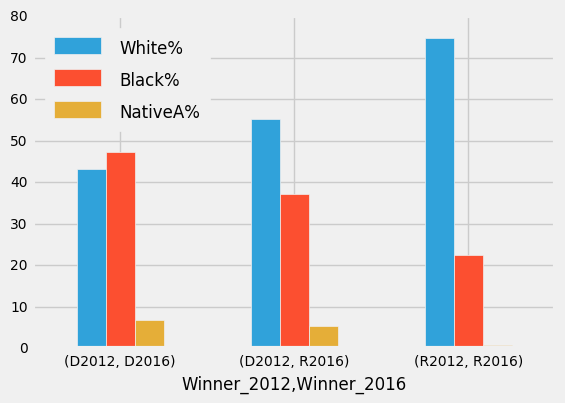

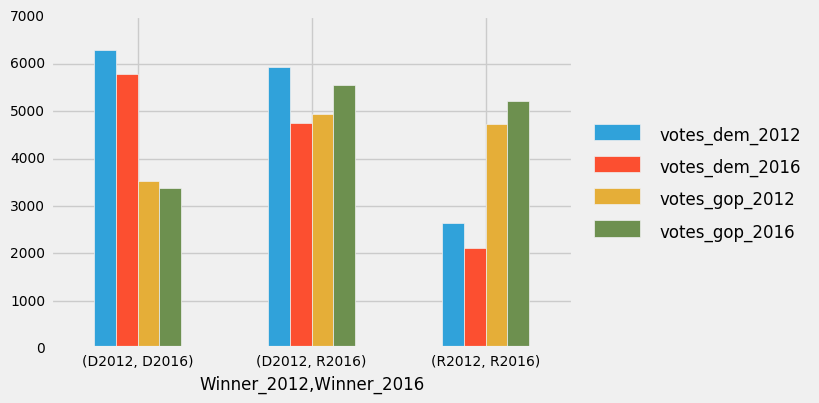

In [350]:
with plt.style.context('fivethirtyeight'):
    swingers[swingers['Combined_Cluster0']==1].groupby(['Winner_2012','Winner_2016']).mean()[['White%','Black%','NativeA%']].plot(kind='bar',rot=False)
    swingers[swingers['Combined_Cluster0']==1].groupby(['Winner_2012','Winner_2016']).mean()[["votes_dem_2012",'votes_dem_2016','votes_gop_2012','votes_gop_2016']].plot(kind='bar',rot=False)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [344]:
#'Winner2012','Winner2016'
swingers.groupby(['Combined_Cluster4','Winner2012','Winner2016']).mean()[['Female%',
 'White%',
 'Black%',
 'NativeA%',
 'Asian%',
 'PIsland%',
 'TwoRace%',
 'Latino',
 'WhiteNLat%',
 'PerCapitaIncome',
 'MedianIncome',
 '%BelowPoverty']]

Female%     White%     Black%  \
Combined_Cluster4 Winner2012 Winner2016                                    
0.0               0          0           49.627944  86.128295  10.017926   
                             1           50.157143  76.257143  15.885714   
                  1          0           50.009091  81.401515  13.728788   
                             1           50.613158  65.477632  26.931579   
1.0               0          0           50.543396  89.179245   6.466038   
                  1          0           50.336364  89.218182   7.100000   
                             1           51.041176  77.982353  15.558824   

                                         NativeA%    Asian%  PIsland%  \
Combined_Cluster4 Winner2012 Winner2016                                 
0.0               0          0           1.149736  0.973111  0.076098   
                             1           0.385714  5.342857  0.085714   
                  1          0           2.034848  0.995455  0.057576   
                             1           2.357237  2.913158  0.110526   
1.0               0          0           0.883019  1.554717  0.081132   
                  1          0           0.518182  1.236364  0.045455   
                             1           0.723529  3.358824  0.117647   

                                         TwoRace%     Latino  WhiteNLat%  \
Combined_Cluster4 Winner2012 Winner2016                                    
0.0               0          0           1.643761   6.323726   80.646221   
                             1           2.000000   8.014286   69.557143   
                  1          0           1.784848   6.371212   76.063636   
                             1           2.207895  10.473026   56.644079   
1.0               0          0           1.843396   7.328302   82.869811   
                  1          0           1.900000   6.809091   83.145455   
                             1           2.235294  13.323529   66.558824   

                                         PerCapitaIncome  MedianIncome  \
Combined_Cluster4 Winner2012 Winner2016                                  
0.0               0          0              22730.994728  44894.256591   
                             1              28208.142857  57338.285714   
                  1          0              22503.757576  43257.590909   
                             1              25413.032895  47987.486842   
1.0               0          0              27976.094340  54699.000000   
                  1          0              28009.727273  54309.818182   
                             1              28814.176471  53209.294118   

                                         %BelowPoverty  
Combined_Cluster4 Winner2012 Winner2016                 
0.0               0          0               16.738137  
                             1               17.300000  
                  1          0               17.587879  
                             1               19.545395  
1.0               0          0               11.660377  
                  1          0               11.763636  
                             1               14.435294

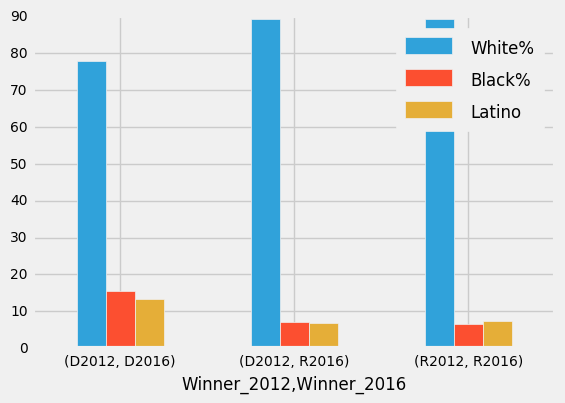

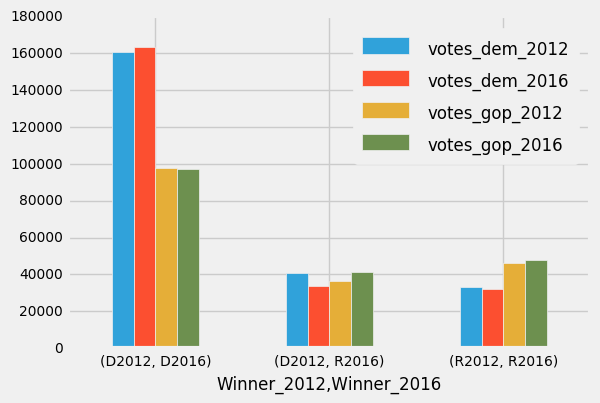

In [345]:
with plt.style.context('fivethirtyeight'):
    swingers[swingers['Combined_Cluster4']==1].groupby(['Winner_2012','Winner_2016']).mean()[['White%','Black%','Latino']].plot(rot=False,kind="bar")
    swingers[swingers['Combined_Cluster4']==1].groupby(['Winner_2012','Winner_2016']).mean()[['votes_dem_2012','votes_dem_2016','votes_gop_2012','votes_gop_2016']].plot(rot=False,kind="bar")

In [261]:
swingers.groupby(['Winner_2012','Winner_2016']).mean()['Pop2014'].plot(kind="bar",rot=False)

Combined_Cluster4  Winner2012  Winner2016
0.0                0           0              64096.717047
                               1             377728.857143
                   1           0              94114.878788
                               1             240508.815789
1.0                0           0             203053.962264
                   1           0             159754.363636
                               1             597632.588235
Name: Pop2014, dtype: float64

In [257]:
swingers.groupby(['Winner2016']).mean()[['Female%',
 'White%',
 'Black%',
 'NativeA%',
 'Asian%',
 'PIsland%',
 'TwoRace%',
 'Latino',
 'WhiteNLat%',
 'PerCapitaIncome',
 'MedianIncome',
 '%BelowPoverty','Pop/SqMile',"Manfact shipments 1k"]]

,Female%,White%,Black%,NativeA%,Asian%,PIsland%,TwoRace%,Latino,WhiteNLat%,PerCapitaIncome,MedianIncome,%BelowPoverty,Pop/SqMile,Manfact shipments 1k
Winner2016,,,,,,,,,,,,,,
0,49.744492,85.961946,10.053076,1.203147,1.023462,0.074249,1.676252,6.412017,80.421459,23190.306152,45631.313305,16.355079,154.082833,1.192844e+06
1,50.636364,67.114205,25.393750,2.121023,3.052841,0.110227,2.202273,10.650568,58.115341,25852.721591,48863.772727,18.962500,993.472159,3.565962e+06


In [247]:
swingers.groupby(['Winner2012','Winner2016']).count()[['Manfact shipments 1k']]

Manfact shipments 1k
Winner2012 Winner2016                      
0          0                            622
           1                              7
1          0                             77
           1                            169

In [248]:
swingers.groupby(['Combined_Cluster1','Winner2012','Winner2016']).mean()[['Female%',
 'White%',
 'Black%',
 'NativeA%',
 'Asian%',
 'PIsland%',
 'TwoRace%',
 'Latino',
 'WhiteNLat%',
 'PerCapitaIncome',
 'MedianIncome',
 '%BelowPoverty']]

Female%     White%     Black%  \
Combined_Cluster1 Winner2012 Winner2016                                    
0.0               0          0           49.775947  85.325612  10.676169   
                             1           50.157143  76.257143  15.885714   
                  1          0           50.035385  82.909231  12.736923   
                             1           50.710274  67.343151  24.841096   
1.0               0          0           49.524277  89.146243   7.221387   
                  1          0           50.166667  80.400000  13.025000   
                             1           50.313043  62.878261  31.795652   

                                         NativeA%    Asian%  PIsland%  \
Combined_Cluster1 Winner2012 Winner2016                                 
0.0               0          0           1.069710  1.158575  0.081514   
                             1           0.385714  5.342857  0.085714   
                  1          0           1.518462  1.052308  0.055385   
                             1           2.363699  3.150685  0.111644   
1.0               0          0           1.275723  0.669942  0.063584   
                  1          0           3.441667  0.908333  0.058333   
                             1           1.108696  1.734783  0.108696   

                                         TwoRace%     Latino  WhiteNLat%  \
Combined_Cluster1 Winner2012 Winner2016                                    
0.0               0          0           1.680178   6.708463   79.531403   
                             1           2.000000   8.014286   69.557143   
                  1          0           1.738462   6.075385   77.792308   
                             1           2.186986  10.501370   58.480822   
1.0               0          0           1.610405   5.632948   84.220809   
                  1          0           2.141667   8.375000   73.191667   
                             1           2.360870  12.400000   52.313043   

                                         PerCapitaIncome  MedianIncome  \
Combined_Cluster1 Winner2012 Winner2016                                  
0.0               0          0              24019.964365  47571.429844   
                             1              28208.142857  57338.285714   
                  1          0              23510.015385  45420.261538   
                             1              26396.260274  49790.986301   
1.0               0          0              20992.514451  40949.751445   
                  1          0              22100.333333  41674.333333   
                             1              21685.565217  40398.782609   

                                         %BelowPoverty  
Combined_Cluster1 Winner2012 Winner2016                 
0.0               0          0               15.707127  
                             1               17.300000  
                  1          0               16.530769  
                             1               18.745890  
1.0               0          0               17.858382  
                  1          0               17.975000  
                             1               20.843478

In [249]:
swingers.groupby(['Combined_Cluster3','Winner2012','Winner2016']).mean()[['Female%',
 'White%',
 'Black%',
 'NativeA%',
 'Asian%',
 'PIsland%',
 'TwoRace%',
 'Latino',
 'WhiteNLat%',
 'PerCapitaIncome',
 'MedianIncome',
 '%BelowPoverty','Pop2014']]

Female%     White%     Black%  \
Combined_Cluster3 Winner2012 Winner2016                                    
0.0               0          0           49.726376  85.821632  10.251613   
                             1           50.583333  74.183333  17.900000   
                  1          0           50.053125  81.078125  13.904688   
                             1           50.590000  66.170000  26.438000   
1.0               0          0           49.592632  89.531579   6.740000   
                             1           47.600000  88.700000   3.800000   
                  1          0           50.069231  89.607692   7.253846   
                             1           51.178947  71.200000  20.652632   

                                         NativeA%    Asian%  PIsland%  \
Combined_Cluster3 Winner2012 Winner2016                                 
0.0               0          0           1.176660  1.000380  0.078748   
                             1           0.416667  5.300000  0.083333   
                  1          0           2.084375  1.006250  0.060938   
                             1           2.160000  2.944667  0.108000   
1.0               0          0           0.851579  1.146316  0.064211   
                             1           0.200000  5.600000  0.100000   
                  1          0           0.507692  1.146154  0.030769   
                             1           2.452632  3.063158  0.136842   

                                         TwoRace%     Latino  WhiteNLat%  \
Combined_Cluster3 Winner2012 Winner2016                                    
0.0               0          0           1.662998   6.517078   80.176850   
                             1           2.066667   8.866667   66.750000   
                  1          0           1.865625   6.890625   75.245312   
                             1           2.170667  10.866000   56.967333   
1.0               0          0           1.648421   5.811579   84.490526   
                             1           1.600000   2.900000   86.400000   
                  1          0           1.484615   4.184615   86.084615   
                             1           2.526316   9.921053   62.963158   

                                         PerCapitaIncome  MedianIncome  \
Combined_Cluster3 Winner2012 Winner2016                                  
0.0               0          0              22954.017078  44963.637571   
                             1              28652.000000  58505.333333   
                  1          0              22977.781250  43840.156250   
                             1              25821.586667  48289.226667   
1.0               0          0              24420.021053  49979.389474   
                             1              25545.000000  50336.000000   
                  1          0              24829.000000  49741.461538   
                             1              25230.736842  50277.473684   

                                         %BelowPoverty        Pop2014  
Combined_Cluster3 Winner2012 Winner2016                                
0.0               0          0               16.901328   71767.836812  
                             1               16.766667  414226.666667  
                  1          0               17.423437  108955.796875  
                             1               19.445333  267786.846667  
1.0               0          0               13.000000   99065.705263  
                             1               20.500000  158742.000000  
                  1          0               13.469231   76593.000000  
                             1               15.763158  344687.736842

In [250]:
swingers.groupby('Combined_Cluster').mean()[['Female%',
 'White%',
 'Black%',
 'NativeA%',
 'Asian%',
 'PIsland%',
 'TwoRace%',
 'Latino',
 'WhiteNLat%',
 'PerCapitaIncome',
 'MedianIncome',
 '%BelowPoverty']]

,Female%,White%,Black%,NativeA%,Asian%,PIsland%,TwoRace%,Latino,WhiteNLat%,PerCapitaIncome,MedianIncome,%BelowPoverty
Combined_Cluster,,,,,,,,,,,,
0,49.673973,60.626027,33.472603,3.602740,0.780822,0.091781,1.420548,7.057534,54.876712,16889.191781,30356.780822,28.024658
1,49.648558,85.737019,10.273558,1.382212,0.801442,0.068269,1.724038,6.539423,80.056250,21133.062500,40930.629808,18.195192
2,50.204348,85.947826,8.021739,0.469565,3.443478,0.086957,2.013043,7.108696,79.726087,39256.565217,80187.913043,6.769565
3,49.860937,86.811719,8.834375,1.049219,1.465625,0.071875,1.761719,6.233594,81.471875,24590.687500,50002.257812,13.516406
4,50.619753,86.834568,8.460494,0.800000,1.890123,0.083951,1.933333,8.516049,79.483951,28156.555556,54333.493827,12.256790
5,50.140541,85.656757,8.435135,0.878378,2.867568,0.089189,2.054054,8.418919,78.416216,33170.945946,68086.216216,8.827027
6,50.325000,74.687500,9.812500,0.687500,11.137500,0.125000,3.575000,14.150000,62.387500,47519.625000,106219.000000,5.500000
7,49.609929,76.739007,18.963121,1.769504,0.856738,0.092199,1.580851,8.434043,69.488652,18841.234043,35605.397163,22.670922
8,50.205691,85.390244,10.385366,1.007317,1.272358,0.081301,1.856098,6.684553,79.631707,23835.650407,44995.357724,15.575610


In [251]:
swingers[swingers['Combined_Cluster']==4].groupby(['Combined_Cluster',"Winner2012"]).mean()[['Female%',
 'White%',
 'Black%',
 'NativeA%',
 'Asian%',
 'PIsland%',
 'TwoRace%',
 'Latino',
 'WhiteNLat%',
 'PerCapitaIncome',
 'MedianIncome',
 '%BelowPoverty']]

Female%     White%     Black%  NativeA%  \
Combined_Cluster Winner2012                                              
4                0           50.543396  89.179245   6.466038  0.883019   
                 1           50.764286  82.396429  12.235714  0.642857   

                               Asian%  PIsland%  TwoRace%     Latino  \
Combined_Cluster Winner2012                                            
4                0           1.554717  0.081132  1.843396   7.328302   
                 1           2.525000  0.089286  2.103571  10.764286   

                             WhiteNLat%  PerCapitaIncome  MedianIncome  \
Combined_Cluster Winner2012                                              
4                0            82.869811     27976.094340  54699.000000   
                 1            73.075000     28498.142857  53641.642857   

                             %BelowPoverty  
Combined_Cluster Winner2012                 
4                0               11.660377  
                 1               13.385714

In [252]:
swingers[swingers['Combined_Cluster']==0].groupby(['Combined_Cluster',"Winner2016"]).count()[['Female%',
 'White%',
 'Black%',
 'NativeA%',
 'Asian%',
 'PIsland%',
 'TwoRace%',
 'Latino',
 'WhiteNLat%',
 'PerCapitaIncome',
 'MedianIncome',
 '%BelowPoverty']]
#0,1,4,6

Female%  White%  Black%  NativeA%  Asian%  \
Combined_Cluster Winner2016                                              
0                0                46      46      46        46      46   
                 1                27      27      27        27      27   

                             PIsland%  TwoRace%  Latino  WhiteNLat%  \
Combined_Cluster Winner2016                                           
0                0                 46        46      46          46   
                 1                 27        27      27          27   

                             PerCapitaIncome  MedianIncome  %BelowPoverty  
Combined_Cluster Winner2016                                                
0                0                        46            46             46  
                 1                        27            27             27

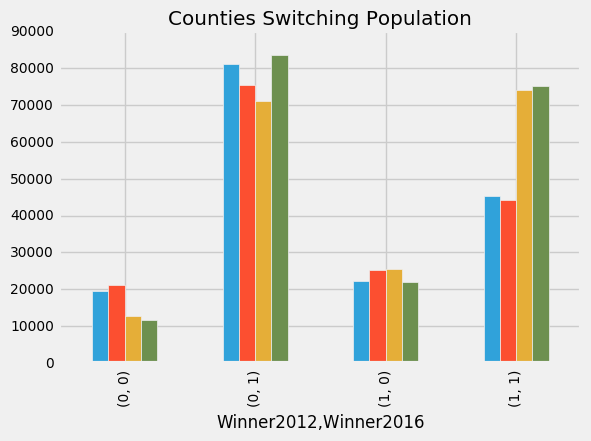

In [256]:
with plt.style.context('fivethirtyeight'):
    swingers.groupby(['Winner2012','Winner2016']).mean()[["votes_gop_2012","votes_gop_2016",'votes_dem_2012','votes_dem_2016']].plot(legend=False,kind="bar",title="Counties Switching Population")

In [254]:
swingers.columns[40:80]

Index(['Black-owned%', 'Native-owned%', 'Asian-owned%', 'PIslnder-owned%',
       'Hispanic-owned%', 'Woman-owned', 'Manfact shipments 1k',
       'Merchant sales 1k', 'Retail sales 1k', 'Retail sales/capita',
       'Accomd/FoodServ sales 1k', 'BuildingPermits', 'LandArea', 'Pop/SqMile',
       'Current_Cluster', 'Demographic_Cluster', 'Economic_Cluster',
       'Owned_Cluster', 'Age_Cluster', 'Education_Cluster', 'Housing_Cluster',
       'Combined_Cluster', 'combined_fips', 'votes_dem_2016', 'votes_gop_2016',
       'total_votes_2016', 'per_dem_2016', 'per_gop_2016', 'diff_2016',
       'per_point_diff_2016', 'state_abbr', 'county_name', 'total_votes_2012',
       'votes_dem_2012', 'votes_gop_2012', 'county_fips', 'state_fips',
       'per_dem_2012', 'per_gop_2012', 'diff_2012'],
      dtype='object')

In [312]:
clusteringalgo(['PerCapitaIncome',
'MedianIncome',
'%BelowPoverty'],'Winner2012',"Winner2016",swingers,swingers[swingers['Economic_Cluster2']==1])

SVC overall accuracy for training is1.0
KMeans overall accuracy for training is0.779428571429
SVC overall accuracy for predictive testing is0.904
KMeans overall accuracy for predictive testing is0.811428571429
SVC subset accuracy for testing is1.0
KMeans subset accuracy for testing is0.743718592965
SVC subset accuracy for predictive testing is0.834170854271
KMeans subset accuracy for predictive testing is0.819095477387


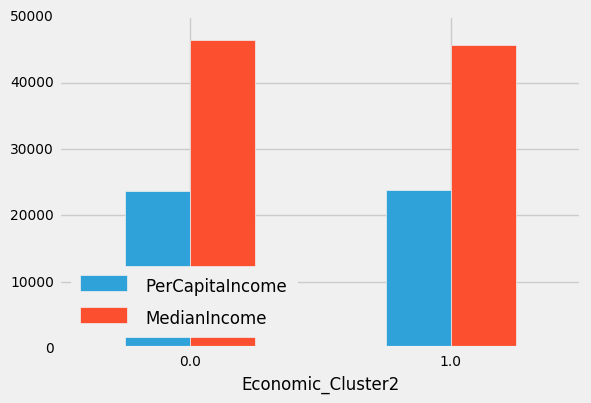

In [346]:
with plt.style.context('fivethirtyeight'):
    swingers.groupby('Economic_Cluster2').mean()[['PerCapitaIncome','MedianIncome']].plot(rot=False,kind="bar")
    plt.legend(loc="lower left")
    

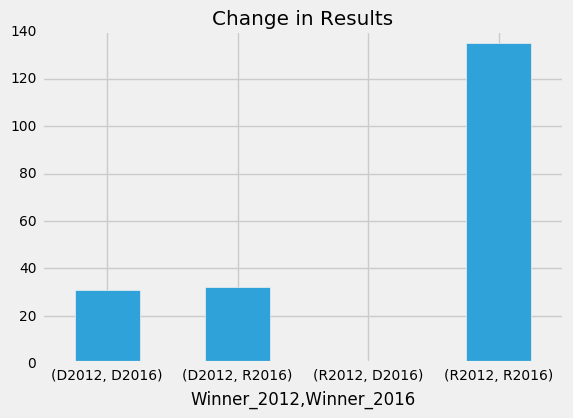

In [334]:
with plt.style.context('fivethirtyeight'):
    swingers[swingers['Economic_Cluster2']==1].groupby(['Winner_2012','Winner_2016']).count()['Asian%'].plot(title="Change in Results",legend=False,rot=False,kind="bar")

In [347]:
swingers[swingers['Economic_Cluster2']==1].groupby(['Winner_2012','Winner_2016']).count()

FIPS  area_name  state_abbreviation  Pop2014  \
Winner_2012 Winner_2016                                                 
D2012       D2016          31         31                  31       31   
            R2016          32         32                  32       32   
R2012       D2016           1          1                   1        1   
            R2016         135        135                 135      135   

                         Pop2010EST  Pop%Change  Pop2010  Under5%  Under18%  \
Winner_2012 Winner_2016                                                       
D2012       D2016                31          31       31       31        31   
            R2016                32          32       32       32        32   
R2012       D2016                 1           1        1        1         1   
            R2016               135         135      135      135       135   

                         Over65%     ...      Combined_Cluster2  \
Winner_2012 Winner_2016              ...                          
D2012       D2016             31     ...                     31   
            R2016             32     ...                     32   
R2012       D2016              1     ...                      1   
            R2016            135     ...                    135   

                         Combined_Cluster3  Combined_Cluster4  \
Winner_2012 Winner_2016                                         
D2012       D2016                       31                 31   
            R2016                       32                 32   
R2012       D2016                        1                  1   
            R2016                      135                135   

                         Combined_Cluster5  Combined_Cluster6  \
Winner_2012 Winner_2016                                         
D2012       D2016                       31                 31   
            R2016                       32                 32   
R2012       D2016                        1                  1   
            R2016                      135                135   

                         Combined_Cluster7  Combined_Cluster8  \
Winner_2012 Winner_2016                                         
D2012       D2016                       31                 31   
            R2016                       32                 32   
R2012       D2016                        1                  1   
            R2016                      135                135   

                         Combined_Cluster9  Winner2016  Winner2012  
Winner_2012 Winner_2016                                             
D2012       D2016                       31          31          31  
            R2016                       32          32          32  
R2012       D2016                        1           1           1  
            R2016                      135         135         135  

[4 rows x 141 columns]